### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [8]:
# Calcular facturación por tienda
facturacion_tienda1 = tienda1["Precio"].sum()
facturacion_tienda2 = tienda2["Precio"].sum()
facturacion_tienda3 = tienda3["Precio"].sum()
facturacion_tienda4 = tienda4["Precio"].sum()

In [9]:
print("Facturación total por tienda:")
print(f"Tienda 1: ${facturacion_tienda1:,.0f}")
print(f"Tienda 2: ${facturacion_tienda2:,.0f}")
print(f"Tienda 3: ${facturacion_tienda3:,.0f}")
print(f"Tienda 4: ${facturacion_tienda4:,.0f}")

Facturación total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


In [13]:
#Ingreso total descontando el precio del envio
ingreso_real_tienda1 = (tienda1["Precio"] - tienda1["Costo de envío"]).sum()
ingreso_real_tienda2 = (tienda2["Precio"] - tienda2["Costo de envío"]).sum()
ingreso_real_tienda3 = (tienda3["Precio"] - tienda3["Costo de envío"]).sum()
ingreso_real_tienda4 = (tienda4["Precio"] - tienda4["Costo de envío"]).sum()

In [15]:
print("Ingreso real (facturación menos costo de envío):")
print(f"Tienda 1: {ingreso_real_tienda1:,.0f} ")
print(f"Tienda 2: {ingreso_real_tienda2:,.0f} ")
print(f"Tienda 3: {ingreso_real_tienda3:,.0f} ")
print(f"Tienda 4: {ingreso_real_tienda4:,.0f} ")

Ingreso real (facturación menos costo de envío):
Tienda 1: 1,089,502,500 
Tienda 2: 1,056,858,400 
Tienda 3: 1,039,503,000 
Tienda 4: 983,058,300 


<ipython-input-46-396cbd4cda32>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tienda1["Mes"] = pd.to_datetime(tienda1["Fecha de Compra"]).dt.to_period("M")


<Axes: title={'center': 'Ventas mensuales - Tienda 1'}, xlabel='Mes'>

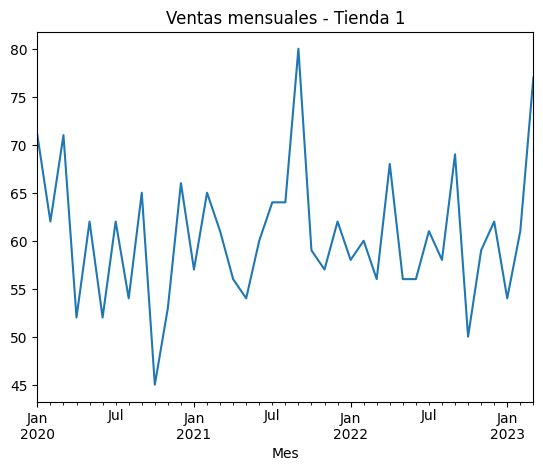

In [46]:
tienda1["Mes"] = pd.to_datetime(tienda1["Fecha de Compra"]).dt.to_period("M")
ventas_por_mes = tienda1.groupby("Mes")["Producto"].count()
ventas_por_mes.plot(kind="line", title="Ventas mensuales - Tienda 1")

# 2. Ventas por categoría

In [16]:
print("Tienda 1 - Productos vendidos por categoría:")
print(tienda1["Categoría del Producto"].value_counts())
print()

print("Tienda 2 - Productos vendidos por categoría:")
print(tienda2["Categoría del Producto"].value_counts())
print()

print("Tienda 3 - Productos vendidos por categoría:")
print(tienda3["Categoría del Producto"].value_counts())
print()

print("Tienda 4 - Productos vendidos por categoría:")
print(tienda4["Categoría del Producto"].value_counts())
print()

Tienda 1 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Tienda 2 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Tienda 3 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    17

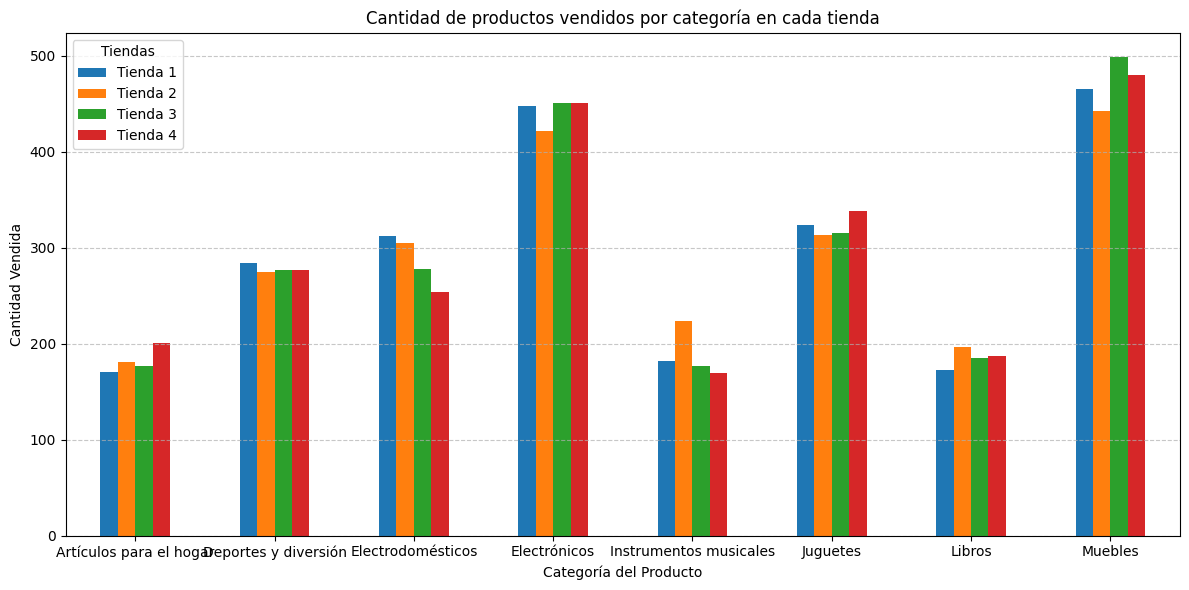

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular cantidad de productos vendidos por categoría en cada tienda
cat1 = tienda1["Categoría del Producto"].value_counts()
cat2 = tienda2["Categoría del Producto"].value_counts()
cat3 = tienda3["Categoría del Producto"].value_counts()
cat4 = tienda4["Categoría del Producto"].value_counts()

# Unir todas las tiendas en un DataFrame
df_categorias = pd.DataFrame({
    'Tienda 1': cat1,
    'Tienda 2': cat2,
    'Tienda 3': cat3,
    'Tienda 4': cat4
}).fillna(0)

# Crear gráfico de barras
df_categorias.plot(kind='bar', figsize=(12, 6))
plt.title('Cantidad de productos vendidos por categoría en cada tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=0)
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [21]:
# Calcular calificación promedio por tienda
promedio_tienda1 = tienda1["Calificación"].mean()
promedio_tienda2 = tienda2["Calificación"].mean()
promedio_tienda3 = tienda3["Calificación"].mean()
promedio_tienda4 = tienda4["Calificación"].mean()

In [22]:
print("Calificación promedio por tienda:")
print(f"Tienda 1: {promedio_tienda1:.2f}")
print(f"Tienda 2: {promedio_tienda2:.2f}")
print(f"Tienda 3: {promedio_tienda3:.2f}")
print(f"Tienda 4: {promedio_tienda4:.2f}")

Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [25]:
# Tienda 1
ventas_t1 = tienda1["Producto"].value_counts()
mas_vendido_t1 = ventas_t1.idxmax()
menos_vendido_t1 = ventas_t1.idxmin()

# Tienda 2
ventas_t2 = tienda2["Producto"].value_counts()
mas_vendido_t2 = ventas_t2.idxmax()
menos_vendido_t2 = ventas_t2.idxmin()

# Tienda 3
ventas_t3 = tienda3["Producto"].value_counts()
mas_vendido_t3 = ventas_t3.idxmax()
menos_vendido_t3 = ventas_t3.idxmin()

# Tienda 4
ventas_t4 = tienda4["Producto"].value_counts()
mas_vendido_t4 = ventas_t4.idxmax()
menos_vendido_t4 = ventas_t4.idxmin()

In [26]:
print(f"Tienda 1: Más vendido = {mas_vendido_t1}, Menos vendido = {menos_vendido_t1}")
print(f"Tienda 2: Más vendido = {mas_vendido_t2}, Menos vendido = {menos_vendido_t2}")
print(f"Tienda 3: Más vendido = {mas_vendido_t3}, Menos vendido = {menos_vendido_t3}")
print(f"Tienda 4: Más vendido = {mas_vendido_t4}, Menos vendido = {menos_vendido_t4}")

Tienda 1: Más vendido = Microondas, Menos vendido = Auriculares con micrófono
Tienda 2: Más vendido = Iniciando en programación, Menos vendido = Juego de mesa
Tienda 3: Más vendido = Kit de bancas, Menos vendido = Bloques de construcción
Tienda 4: Más vendido = Cama box, Menos vendido = Guitarra eléctrica


# 5. Envío promedio por tienda

In [31]:
# Calcular el costo de envío promedio por tienda
envio_prom_t1 = tienda1["Costo de envío"].mean()
envio_prom_t2 = tienda2["Costo de envío"].mean()
envio_prom_t3 = tienda3["Costo de envío"].mean()
envio_prom_t4 = tienda4["Costo de envío"].mean()

In [36]:
print("Costo de envío promedio por tienda:")
print(f"Tienda 1: ${envio_prom_t1:,.0f}")
print(f"Tienda 2: ${envio_prom_t2:,.0f}")

Costo de envío promedio por tienda:
Tienda 1: $26,019
Tienda 2: $25,216
Tienda 3: $24,806
Tienda 4: $23,459


##INFORME FINAL


Luego de analizar cinco factores clave relacionados con el desempeño de las cuatro tiendas del Sr. Juan, se llegó a una conclusión clara sobre cuál de ellas representa la opción más adecuada para ser vendida.

1. Ingreso real (facturación menos costo de envío)
La Tienda 1 obtuvo el ingreso más alto, superando los 1.089 millones de pesos. Le siguieron la Tienda 2 con 1.056 millones, la Tienda 3 con 1.039 millones y, por último, la Tienda 4 con un ingreso significativamente menor: 983 millones de pesos. Esto indica que la Tienda 4 genera menos ganancias netas que sus competidoras.

2. Categorías de productos más y menos vendidas
En general, las categorías más vendidas fueron Muebles y Electrónica en todas las tiendas, lo que demuestra una fuerte demanda en esas líneas de productos. Sin embargo, en la Tienda 4, aunque también se venden Muebles, no lidera ni destaca en ninguna categoría. Además, comparte las categorías menos vendidas con otras tiendas, como Instrumentos musicales y Libros, sin lograr compensar con un volumen más alto en las más populares.

3. Calificación promedio de los clientes
En cuanto a la percepción del cliente, la Tienda 3 obtuvo la mejor calificación promedio (4.05 sobre 5), seguida de cerca por la Tienda 2 (4.04) y la Tienda 4 (4.00). La Tienda 1 fue la que recibió la calificación más baja, con 3.98. Aunque la Tienda 4 no se ubica al final en este aspecto, tampoco es la mejor valorada, y su calificación no es suficiente para compensar sus debilidades en otros aspectos.

4. Productos más y menos vendidos
El producto más vendido en la Tienda 4 fue la "Cama box", mientras que el menos vendido fue la "Guitarra eléctrica". A diferencia de otras tiendas, cuyos productos más vendidos están más alineados con artículos de alta demanda (como Microondas, Kits de programación o Bancas), los productos de la Tienda 4 no muestran un comportamiento de ventas tan sólido ni recurrente.

5. Costo de envío promedio
La Tienda 4 tiene el costo de envío promedio más bajo entre todas las tiendas, lo que podría ser una ventaja. Sin embargo, este beneficio no logra compensar los ingresos más bajos ni la baja rotación de productos clave. En comparación con el rendimiento general, esta ventaja es menor y no decisiva.

Conclusión y recomendación
Después de considerar todos los factores —ingresos, categorías más y menos vendidas, calificaciones de clientes, productos específicos y costos logísticos— se concluye que la Tienda 4 es la menos rentable y la que tiene menos potencial de crecimiento a corto y mediano plazo.

Por lo tanto, se recomienda que el Sr. Juan venda la Tienda 4 y mediante esto podrá hacer sus inversiones.

